<h1 align='center' style='font-family:"Trebuchet MS",sans-serif;font-size:40px'> Performance Analytics</h1>
<h1 align='center' style='font-family:"Trebuchet MS",sans-serif;font-size:20px'> Impact of new trial layouts</h1>

## Outline
(To jump right to a any section of the notebook, click on any element of the outline.)
- <a href='#0' style='text-decoration:none'>0. Objective</a>
    - <a href='#0.1' style='text-decoration:none'>0.1 Importing Libraries</a>
    - <a href='#0.2' style='text-decoration:none'>0.2 Data Overview</a>
    

- <a href='#1' style='text-decoration:none'>1. Data preperation </a>
    - <a href='#1.1' style='text-decoration:none'>1.1 Checking for missing values </a>
    - <a href='#1.2' style='text-decoration:none'>1.2 Feature Engineering </a>
        - <a href='#1.2.1' style='text-decoration:none'>1.2.1 Creating the year - month dimension</a>
        - <a href='#1.2.2' style='text-decoration:none'>1.2.2 Metrics of interest </a>


- <a href='#2' style='text-decoration:none'>2. Assessing Trial stores performances </a>
    - <a href='#2.1' style='text-decoration:none'>2.1 Assessing store 77 performance</a>
        - <a href='#2.1.1' style='text-decoration:none'>2.1.1 Selecting a control store</a>
        - <a href='#2.1.2' style='text-decoration:none'>2.1.2 Comparison of control store, Trial store 77 and other stores</a>
    - <a href='#2.2' style='text-decoration:none'>2.2 Assessing store 86 performance</a>
        - <a href='#2.1.1' style='text-decoration:none'>2.1.1 Selecting a control store</a>
        - <a href='#2.1.2' style='text-decoration:none'>2.1.2 Comparison of control store, Trial store 86 and other stores</a>
    - <a href='#2.3' style='text-decoration:none'>2.3 Assessing store 88 performance</a>
        - <a href='#2.1.1' style='text-decoration:none'>2.1.1 Selecting a control store</a>
        - <a href='#2.1.2' style='text-decoration:none'>2.1.2 Comparison of control store, Trial store 88 and other stores</a>


- <a href='#3' style='text-decoration:none'>3. Conclusion and Recommendation </a>
    - <a href='#3.1' style='text-decoration:none'>3.1 Conclusion </a>
    - <a href='#3.2' style='text-decoration:none'>3.2 Recommendation </a>

# <a id='0'>0. Objective</a>

The aim of this project is to analyze the impact of the new trial layouts and company's performance and determine whether or not the trial layout should be rolled out to other stores.

The client has selected stores 77, 86 and 88 as trial stores and want control stores to be established stores that are operational for the entire observation period.

To identify suitable control stores I would match trial stores to stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of:

- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

## <a id='0.1'>0.1 Importing Libraries</a>

In [1]:
# Importing Libraries for data handling
import numpy as np
import pandas as pd

# Importing Libraries for Visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing librabries for formating Dates
import matplotlib.dates as mdates

# Importing Libraries to remove warnings
import warnings
warnings.filterwarnings('ignore')

# Statistics
from statistics import stdev
from scipy.stats import t

## <a id='0.2'>0.2 Data Overview</a>

In [2]:
# load dataset
df = pd.read_csv('QVI_data.csv')

In [3]:
df.head(5)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.shape

(264834, 12)

The dataset contains 264834 rows and 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [6]:
df['STORE_NBR'].nunique()

272

There are 272 unique stores in the dataset (Trial stores included). From these, I would select the most similar to the trial store during pre-trial period.

# <a id='1.'>1. Data preperation </a>

I would run through the standard pre-checks, such as checking for missing numbers, and I would also create features to help with the analysis.

## <a id='1.1'>1.1 Checking for missing values </a>

In [7]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Great! There are no missing values

## <a id='1.1'>1.1 Feature Engineering </a>

Now, I would create new features and measures

### <a id='#1.2.1'>1.2.1 Creating the year - month dimension</a>

In [8]:
# convert date feature from string to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [9]:
#create yearmonth column
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m')

### <a id='#1.2.1'>1.2.1 Metrics of Interest</a>

These are the following metrics I am interested in to enable me select the appropriate control stores
- Total sales
- Number of customers
- Transactions per customer
- Chips per customer 
- Average price per unit.

So I will estimate each stores performance on this basis

In [10]:
txn_per_customer = lambda x: x.count()/x.nunique()

In [11]:
chips_per_txn = lambda x: x.sum()/x.count()

In [12]:
# get metrics for each store 
measureOverTime = df.groupby(['STORE_NBR', 'YEARMONTH']).agg({'TOT_SALES':['sum'], 
                                                              'LYLTY_CARD_NBR':[pd.Series.nunique, txn_per_customer], 
                                                              'PROD_QTY': chips_per_txn})

In [13]:
measureOverTime.head()

TOT_SALES LYLTY_CARD_NBR             PROD_QTY
                          sum        nunique <lambda_0>  <lambda>
STORE_NBR YEARMONTH                                              
1         201807        206.9             49   1.061224  1.192308
          201808        176.1             42   1.023810  1.255814
          201809        278.8             59   1.050847  1.209677
          201810        188.1             44   1.022727  1.288889
          201811        192.6             46   1.021739  1.212766

In [14]:
# rename columns
measureOverTime.columns = ['totSales', 'nCustomers', 'nTxnPerCust' ,'nChipsPerTxn' ]

In [15]:
# calculate average price per unit
avg_price_per_unit = df.groupby(['STORE_NBR', 'YEARMONTH']).sum()['TOT_SALES'] / df.groupby(['STORE_NBR', 'YEARMONTH']).sum()['PROD_QTY']

In [16]:
# insert last metric into measureOverTime
measureOverTime = pd.concat([measureOverTime, avg_price_per_unit], axis = 1)

In [17]:
# rename avg_price_per_unit column
measureOverTime.rename({0:'avgPricePerUnit'}, axis=1, inplace=True)

In [18]:
measureOverTime.head()

totSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
STORE_NBR YEARMONTH                                                    
1         201807        206.9          49     1.061224      1.192308   
          201808        176.1          42     1.023810      1.255814   
          201809        278.8          59     1.050847      1.209677   
          201810        188.1          44     1.022727      1.288889   
          201811        192.6          46     1.021739      1.212766   

                     avgPricePerUnit  
STORE_NBR YEARMONTH                   
1         201807            3.337097  
          201808            3.261111  
          201809            3.717333  
          201810            3.243103  
          201811            3.378947

I am only interested in stores that have complete record from July 2018 - June 2019

In [19]:
# drop stores haveing less than 12 months in measureOverTime
incomplete_store = list()
for n in df['STORE_NBR'].unique():
    store_df = measureOverTime.loc[(n, '201807'):(n, '201906')]
    if len(store_df) == 12: continue
    measureOverTime.drop(store_df.index, inplace=True)
    incomplete_store.append(n)

print(incomplete_store)
len(incomplete_store)

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]


12

Of the 272 stores, 12 stores did not sell through out the year. These store have been removed which means we have only 260 stores for our analysis

In [20]:
measureOverTime.shape

(3120, 5)

In [21]:
# Verified statement
measureOverTime.shape[0]/12

260.0

In [22]:
measureOverTime = measureOverTime.reset_index()

In [23]:
# convert yearmonth to int
measureOverTime['YEARMONTH'] = measureOverTime['YEARMONTH'].astype(int)

In [24]:
preTrialMeasures = measureOverTime.loc[ measureOverTime['YEARMONTH'] < 201902 , :]

In [25]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


The data - frame is ready for exploration to identify control stores

# <a id='2.'>2. Assessing Trial Stores Performance </a>

Because stores 77, 86, and 88 were chosen as trial stores, I'll examine them one by one, measuring the correlation and magnitude distance between each trial store and the other stores. The control store would be the one with the highest score. To accomplish this, I'd write a function that determines the correlation and magnitude distance between the trial and other stores using a single metric.

In [26]:
# create a function that estimates the correlation between the trial store and other store based on a single metrics
def calculateCorrelation (trial_store, df, metric):
    control_store = list()
    measure_corr = list()
    for i in df['STORE_NBR'].unique():
        control_store.append(i)
        measure_corr.append(df[df['STORE_NBR'] == i][metric].reset_index()[metric].corr(df[df['STORE_NBR'] == trial_store][metric].reset_index()[metric], method = 'pearson'))
    
    calcCorrTable = pd.DataFrame({'Trial_store':trial_store, 'Control_store':control_store, 'Corr':measure_corr})
    return calcCorrTable

In [27]:
# create a function that estimates the magnitude distance between the trial store and other store based on a single metrics
def calculateMagnitudeDistance (trial_store, df, metric):
    control_store = list()
    measure_mag = list()
    a = df[df['STORE_NBR'] == trial_store][metric].reset_index()[metric]
    for i in df['STORE_NBR'].unique():
        control_store.append(i)
        b = df[df['STORE_NBR'] == i][metric].reset_index()[metric]
        c = abs(a-b)
        d = np.mean(1-(c-min(c))/(max(c)-min(c)))
        measure_mag.append(d)
    finalDistTable = pd.DataFrame({'Trial_store':trial_store, 'Control_store':control_store, 'Magnitude':measure_mag})
    return finalDistTable

## <a id='2.1'>2.1 Assessing Store 77 Performance </a>

In [28]:
# get corr for totsales and nCustomers metrics
corr_nSales = calculateCorrelation(77, preTrialMeasures, 'totSales')
corr_nCustomers = calculateCorrelation(77, preTrialMeasures, 'nCustomers')

# get magnitude distance for totsales and nCustomers metrics
magnitude_nSales = calculateMagnitudeDistance(77, preTrialMeasures, 'totSales')
magnitude_nCustomers = calculateMagnitudeDistance(77, preTrialMeasures, 'nCustomers')

In [29]:
# join corr and magnitude df together
score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)
score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)

In [30]:
# estimate a single score using a weight averaged of 0.5
corr_weight = 0.5
score_nSales['scoreNSales'] = (corr_weight * score_nSales['Corr']) + ((1-corr_weight) * score_nSales['Magnitude'])
score_nCustomers['scoreNCust'] = (corr_weight * score_nCustomers['Corr']) + ((1-corr_weight) * score_nCustomers['Magnitude'])                                                              

In [31]:
score_nSales.head()

,Trial_store,Control_store,Corr,Magnitude,scoreNSales
0,77,1,0.075218,0.408163,0.241691
1,77,2,-0.263079,0.590119,0.163520
2,77,3,0.806644,0.522914,0.664779
3,77,4,-0.263300,0.644934,0.190817
4,77,5,-0.110652,0.516320,0.202834


In [32]:
score_nCustomers.head()

,Trial_store,Control_store,Corr,Magnitude,scoreNCust
0,77,1,0.322168,0.663866,0.493017
1,77,2,-0.572051,0.471429,-0.050311
2,77,3,0.834207,0.489796,0.662002
3,77,4,-0.295639,0.498258,0.101310
4,77,5,0.370659,0.512605,0.441632


In [33]:
# join both scores together
score_Control = pd.concat([score_nSales[['Trial_store', 'Control_store', 'scoreNSales']], 
                           score_nCustomers['scoreNCust']], axis = 1)

In [34]:
score_Control.head()

,Trial_store,Control_store,scoreNSales,scoreNCust
0,77,1,0.241691,0.493017
1,77,2,0.163520,-0.050311
2,77,3,0.664779,0.662002
3,77,4,0.190817,0.101310
4,77,5,0.202834,0.441632


In [35]:
# get average of both scores
score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNSales'] + score_Control['scoreNCust'])

In [36]:
score_Control.head()

,Trial_store,Control_store,scoreNSales,scoreNCust,finalControlScore
0,77,1,0.241691,0.493017,0.367354
1,77,2,0.163520,-0.050311,0.056604
2,77,3,0.664779,0.662002,0.663390
3,77,4,0.190817,0.101310,0.146064
4,77,5,0.202834,0.441632,0.322233


### <a id='#2.1.1'>2.1.1 Selecting a control store</a>

In [37]:
# sort by finalControl score
score_Control.sort_values(by='finalControlScore', ascending=False)

,Trial_store,Control_store,scoreNSales,scoreNCust,finalControlScore
221,77,233,0.697290,0.816607,0.756949
67,77,71,0.789497,0.663123,0.726310
79,77,84,0.656972,0.715000,0.685986
111,77,119,0.636046,0.729729,0.682887
108,77,115,0.708347,0.645155,0.676751
...,...,...,...,...,...
230,77,242,-0.121818,-0.046675,-0.084247
178,77,186,-0.128806,-0.057268,-0.093037
95,77,102,-0.102238,-0.119121,-0.110680
8,77,9,-0.144121,-0.087135,-0.115628


Store 233 had the highest final score, therefore I will be selecting this as the control store for trial store 77

### <a id='#2.1.2'>2.1.2 Comparison of control store, Trial store 77 and other stores</a>

Now that I have selected store 233, I will plot the totSales and nCustomers over the pre-trial period for the control store, Trial store 77 and other stores

In [38]:
preTrialMeasures['TransactionMonth'] = pd.to_datetime(preTrialMeasures['YEARMONTH'].astype(str), format='%Y%m')

In [39]:
preTrialMeasures.set_index('TransactionMonth', inplace=True)

In [40]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
TransactionMonth,,,,,,,
2018-07-01,1,201807,206.9,49,1.061224,1.192308,3.337097
2018-08-01,1,201808,176.1,42,1.023810,1.255814,3.261111
2018-09-01,1,201809,278.8,59,1.050847,1.209677,3.717333
2018-10-01,1,201810,188.1,44,1.022727,1.288889,3.243103
2018-11-01,1,201811,192.6,46,1.021739,1.212766,3.378947


In [41]:
# get time series totsales plot for each category 
tStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 77,'totSales']
cStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 233,'totSales']
otherStore = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] != 233) & (preTrialMeasures['STORE_NBR'] != 77),'totSales']
otherStore = otherStore.reset_index().groupby('TransactionMonth').mean()

In [42]:
comparisonPlot = pd.concat([tStore, cStore, otherStore], axis=1)
comparisonPlot.columns = ['Trial Store', 'Control Store', 'Other Store']

<AxesSubplot:xlabel='TransactionMonth'>

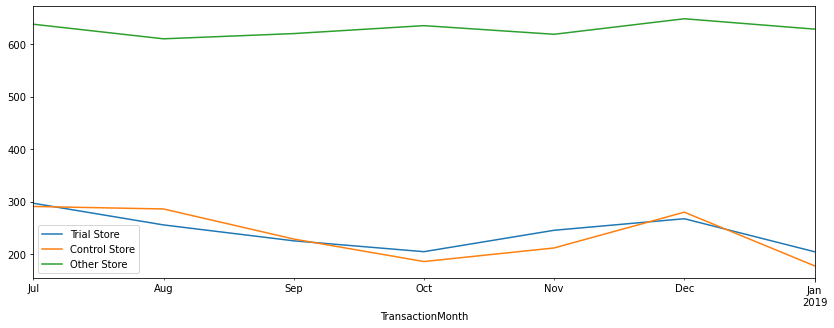

In [43]:
comparisonPlot.plot(figsize=(14,5))

It is obvious from this that the overall sales of the control and trial stores during the pre-trial period are closely related. However, I'd make a comparison based on the number of customers.

In [44]:
# get time series nCustomers plot for each category 
tStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 77,'nCustomers']
cStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 233,'nCustomers']
otherStore = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] != 233) & (preTrialMeasures['STORE_NBR'] != 77),'nCustomers']
otherStore = otherStore.reset_index().groupby('TransactionMonth').mean()

In [45]:
comparisonPlot = pd.concat([tStore, cStore, otherStore], axis=1)
comparisonPlot.columns = ['Trial Store', 'Control Store', 'Other Store']

<AxesSubplot:xlabel='TransactionMonth'>

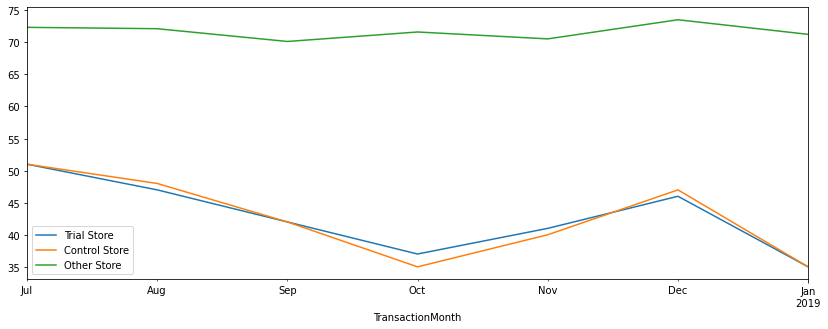

In [46]:
comparisonPlot.plot(figsize=(14,5))

Just like the Total sales plot, The number of customer plots for the trial and control are closely related while the average of other stores is relatively higher.

### <a id='#2.1.3'>2.1.3 Assessment of trial strore 77</a>

After confirming that the trial and control stores are very identical, I'll compare their performance during the trial time. I would commence by scaling the control store to the level of the trial store.

In [47]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
TransactionMonth,,,,,,,
2018-07-01,1,201807,206.9,49,1.061224,1.192308,3.337097
2018-08-01,1,201808,176.1,42,1.023810,1.255814,3.261111
2018-09-01,1,201809,278.8,59,1.050847,1.209677,3.717333
2018-10-01,1,201810,188.1,44,1.022727,1.288889,3.243103
2018-11-01,1,201811,192.6,46,1.021739,1.212766,3.378947


In [48]:
# get scaling factor
trial_totSales = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 77]['totSales'].sum()
control_totSales = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 233]['totSales'].sum()
scalingFactorForControlSales = trial_totSales/control_totSales

In [49]:
scalingFactorForControlSales

1.023617303289553

In [50]:
scaledControlSales = measureOverTime.loc[measureOverTime['STORE_NBR'] == 233, 'totSales'] * scalingFactorForControlSales

In [51]:
# reset index
scaledControlSales = scaledControlSales.reset_index(drop=True)

In [52]:
trialStore = measureOverTime.loc[measureOverTime['STORE_NBR'] == 77, ['YEARMONTH','totSales']].reset_index(drop=True)

In [53]:
# join trial store and scaled control store
percentageDiff = pd.concat([trialStore, scaledControlSales], axis =1)

In [54]:
percentageDiff.head()

,YEARMONTH,totSales,totSales
0,201807,296.8,297.565550
1,201808,255.5,292.652187
2,201809,225.2,233.998916
3,201810,204.5,190.085733
4,201811,245.3,216.597421


In [55]:
percentageDiff.columns = ['YEARMONTH', 'Trial_store', 'Scaled_control_store']

In [56]:
percentageDiff.head()

,YEARMONTH,Trial_store,Scaled_control_store
0,201807,296.8,297.565550
1,201808,255.5,292.652187
2,201809,225.2,233.998916
3,201810,204.5,190.085733
4,201811,245.3,216.597421


In [57]:
percentageDiff['percentageDiff'] = abs(percentageDiff['Trial_store'] - percentageDiff['Scaled_control_store'])/percentageDiff['Scaled_control_store']

In [58]:
percentageDiff.head(12)

,YEARMONTH,Trial_store,Scaled_control_store,percentageDiff
0,201807,296.8,297.565550,0.002573
1,201808,255.5,292.652187,0.126950
2,201809,225.2,233.998916,0.037602
3,201810,204.5,190.085733,0.075830
4,201811,245.3,216.597421,0.132516
5,201812,267.3,286.408121,0.066716
6,201901,204.4,181.692071,0.124980
7,201902,235.0,249.762622,0.059107
8,201903,278.5,203.802205,0.366521
9,201904,263.5,162.345704,0.623080


As my null hypothesis is that the trial period is the same as the pre-trial period, I would take the standard deviation based on the scaled percentage difference in the pre-trial period.

In [59]:
# check standard deviation for pretrial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()

In [60]:
# get the degrees of freedom, Since we have 8 pre-trial months, degree of freedom = 8 - 1 = 7
dof = 7

In [61]:
# get t-values for each month
percentageDiff['tValues'] = (percentageDiff['percentageDiff'] - 0) / stdDev

In [62]:
# display t-value during trial period
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905) ,'tValues']

7     1.183534
8     7.339116
9    12.476373
Name: tValues, dtype: float64

In [63]:
# estimate the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

The t-value at the end of the trial period is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

In [64]:
trialAssessment = percentageDiff[['YEARMONTH', 'Trial_store', 'Scaled_control_store']]
trialAssessment['transactionMonth'] = pd.to_datetime(trialAssessment['YEARMONTH'], format = '%Y%m')
trialAssessment.drop('YEARMONTH', axis = 1, inplace=True)
trialAssessment.set_index('transactionMonth', inplace = True)

In [65]:
trialAssessment['Control 5% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 - stdDev*2)
trialAssessment['Control 95% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 + stdDev*2)

In [66]:
trialAssessment.head()

,Trial_store,Scaled_control_store,Control 5% Confidence Interval,Control 95% Confidence Interval
transactionMonth,,,,
2018-07-01,296.8,297.565550,267.844249,327.286851
2018-08-01,255.5,292.652187,263.421640,321.882734
2018-09-01,225.2,233.998916,210.626747,257.371084
2018-10-01,204.5,190.085733,171.099680,209.071786
2018-11-01,245.3,216.597421,194.963341,238.231502


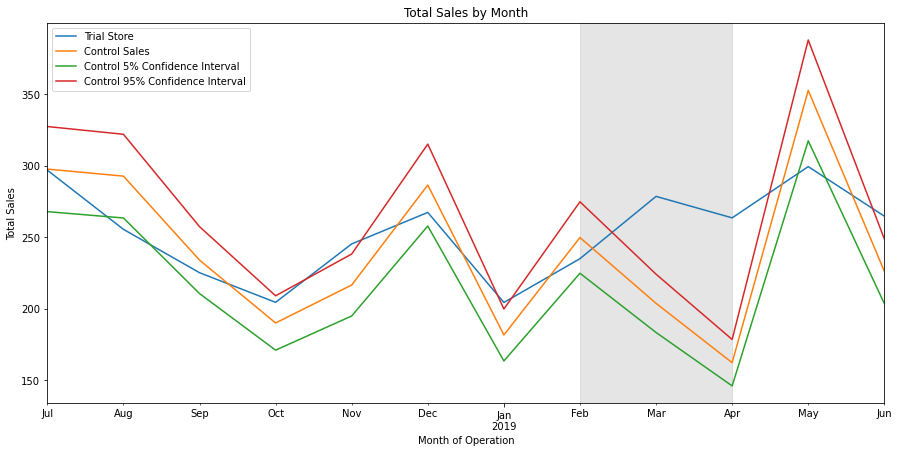

In [67]:
# plot dataframe
trialAssessment.plot(figsize = (15,7))

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

# Highlight trial period
plt.axvspan('2019-02-01', '2019-04-01', color='grey', alpha=0.2)

# set plot legend
plt.legend(['Trial Store', 'Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval' ], loc = 2)


The result demonstrates that the trial store 77 total sales differs considerably from the control store during the trial period, with the trial store performance falling outside the control store's 5% to 95% confidence interval in two of the three trial months.

I will also assess this for number of customers.

In [68]:
# get scaling factor
trial_nCust = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 77]['nCustomers'].sum()
control_nCust = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 233]['nCustomers'].sum()
scalingFactorForControlCust = trial_nCust/control_nCust

In [69]:
scalingFactorForControlCust

1.0033557046979866

In [70]:
scaledControlCustomers = measureOverTime.loc[measureOverTime['STORE_NBR'] == 233, 'nCustomers'] * scalingFactorForControlCust

In [71]:
# reset index
scaledControlCustomers = scaledControlCustomers.reset_index(drop=True)

In [72]:
trialStore = measureOverTime.loc[measureOverTime['STORE_NBR'] == 77, ['YEARMONTH','nCustomers']].reset_index(drop=True)

In [73]:
# join trial store and scaled control store
percentageDiff = pd.concat([trialStore, scaledControlCustomers], axis =1)

In [74]:
percentageDiff.head()

,YEARMONTH,nCustomers,nCustomers
0,201807,51,51.171141
1,201808,47,48.161074
2,201809,42,42.140940
3,201810,37,35.117450
4,201811,41,40.134228


In [75]:
percentageDiff.columns = ['YEARMONTH', 'Trial_store', 'Scaled_control_store']

In [76]:
percentageDiff.head()

,YEARMONTH,Trial_store,Scaled_control_store
0,201807,51,51.171141
1,201808,47,48.161074
2,201809,42,42.140940
3,201810,37,35.117450
4,201811,41,40.134228


In [77]:
percentageDiff['percentageDiff'] = abs(percentageDiff['Trial_store'] - percentageDiff['Scaled_control_store'])/percentageDiff['Scaled_control_store']

In [78]:
percentageDiff.head(12)

,YEARMONTH,Trial_store,Scaled_control_store,percentageDiff
0,201807,51,51.171141,0.003344
1,201808,47,48.161074,0.024108
2,201809,42,42.140940,0.003344
3,201810,37,35.117450,0.053607
4,201811,41,40.134228,0.021572
5,201812,46,47.157718,0.024550
6,201901,35,35.117450,0.003344
7,201902,45,45.151007,0.003344
8,201903,50,40.134228,0.245819
9,201904,47,30.100671,0.561427


As my null hypothesis is that the trial period is the same as the pre-trial period, I would take the standard deviation based on the scaled percentage difference in the pre-trial period.

In [79]:
# check standard deviation for pretrial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()

In [80]:
# get the degrees of freedom, Since we have 8 pre-trial months, degree of freedom = 8 - 1 = 7
dof = 7

In [81]:
# get t-values for each month
percentageDiff['tValues'] = (percentageDiff['percentageDiff'] - 0) / stdDev

In [82]:
# display t-value during trial period
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905) ,'tValues']

7     0.183352
8    13.476388
9    30.778725
Name: tValues, dtype: float64

In [83]:
# estimate the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

The t-value at the end of the trial period is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

In [84]:
trialAssessment = percentageDiff[['YEARMONTH', 'Trial_store', 'Scaled_control_store']]
trialAssessment['transactionMonth'] = pd.to_datetime(trialAssessment['YEARMONTH'], format = '%Y%m')
trialAssessment.drop('YEARMONTH', axis = 1, inplace=True)
trialAssessment.set_index('transactionMonth', inplace = True)

In [85]:
trialAssessment['Control 5% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 - stdDev*2)
trialAssessment['Control 95% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 + stdDev*2)

In [86]:
trialAssessment.head()

,Trial_store,Scaled_control_store,Control 5% Confidence Interval,Control 95% Confidence Interval
transactionMonth,,,,
2018-07-01,51,51.171141,49.304341,53.037941
2018-08-01,47,48.161074,46.404086,49.918062
2018-09-01,42,42.140940,40.603575,43.678304
2018-10-01,37,35.117450,33.836313,36.398587
2018-11-01,41,40.134228,38.670071,41.598385


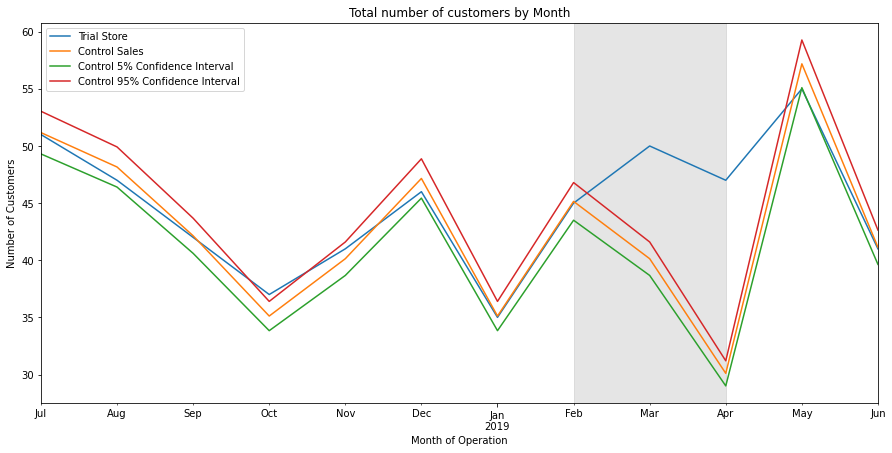

In [87]:
# plot dataframe
trialAssessment.plot(figsize = (15,7))

# Set graph title and axis title
plt.title('Total number of customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

# Highlight trial period
plt.axvspan('2019-02-01', '2019-04-01', color='grey', alpha=0.2)

# set plot legend
plt.legend(['Trial Store', 'Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval' ], loc = 2)


The trial store performed significantly different from the control store on the number of customers statistic, just as it did on the total sales metric. For March and April, the plot shows that trial store numbers lie outside the 5% - 95% confidence interval.

## <a id='2.2'>2.2 Assessing Store 86 Performance </a>

I will repeat the process for store 86

In [88]:
# get corr for totsales and nCustomers metrics
corr_nSales = calculateCorrelation(86, preTrialMeasures, 'totSales')
corr_nCustomers = calculateCorrelation(86, preTrialMeasures, 'nCustomers')

# get magnitude distance for totsales and nCustomers metrics
magnitude_nSales = calculateMagnitudeDistance(86, preTrialMeasures, 'totSales')
magnitude_nCustomers = calculateMagnitudeDistance(86, preTrialMeasures, 'nCustomers')

In [89]:
# join corr and magnitude df together
score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)
score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)

In [90]:
# estimate a single score using a weight averaged of 0.5
corr_weight = 0.5
score_nSales['scoreNSales'] = (corr_weight * score_nSales['Corr']) + ((1-corr_weight) * score_nSales['Magnitude'])
score_nCustomers['scoreNCust'] = (corr_weight * score_nCustomers['Corr']) + ((1-corr_weight) * score_nCustomers['Magnitude'])                                                              

In [91]:
score_nSales.head()

,Trial_store,Control_store,Corr,Magnitude,scoreNSales
0,86,1,0.445632,0.488334,0.466983
1,86,2,-0.403835,0.321131,-0.041352
2,86,3,-0.261284,0.507515,0.123116
3,86,4,-0.039035,0.635654,0.298309
4,86,5,0.235159,0.579835,0.407497


In [92]:
score_nCustomers.head()

,Trial_store,Control_store,Corr,Magnitude,scoreNCust
0,86,1,0.485831,0.510204,0.498018
1,86,2,-0.086161,0.428571,0.171205
2,86,3,-0.353786,0.563025,0.104620
3,86,4,-0.169608,0.537815,0.184103
4,86,5,-0.253229,0.714286,0.230528


In [93]:
# join both scores together
score_Control = pd.concat([score_nSales[['Trial_store', 'Control_store', 'scoreNSales']], 
                           score_nCustomers['scoreNCust']], axis = 1)

In [94]:
score_Control.head()

,Trial_store,Control_store,scoreNSales,scoreNCust
0,86,1,0.466983,0.498018
1,86,2,-0.041352,0.171205
2,86,3,0.123116,0.104620
3,86,4,0.298309,0.184103
4,86,5,0.407497,0.230528


In [95]:
# get average of both scores
score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNSales'] + score_Control['scoreNCust'])

In [96]:
score_Control.head()

,Trial_store,Control_store,scoreNSales,scoreNCust,finalControlScore
0,86,1,0.466983,0.498018,0.482500
1,86,2,-0.041352,0.171205,0.064927
2,86,3,0.123116,0.104620,0.113868
3,86,4,0.298309,0.184103,0.241206
4,86,5,0.407497,0.230528,0.319013


### <a id='#2.2.1'>2.2.1 Selecting a control store</a>

In [97]:
# sort by finalControl score
score_Control.sort_values(by='finalControlScore', ascending=False)

,Trial_store,Control_store,scoreNSales,scoreNCust,finalControlScore
147,86,155,0.808106,0.733343,0.770724
102,86,109,0.697120,0.742532,0.719826
107,86,114,0.631393,0.663384,0.647389
213,86,225,0.601841,0.684356,0.643099
130,86,138,0.593296,0.660565,0.626930
...,...,...,...,...,...
101,86,108,-0.221047,-0.081341,-0.151194
177,86,185,-0.215914,-0.144274,-0.180094
21,86,23,-0.209267,-0.164637,-0.186952
112,86,120,-0.250917,-0.164042,-0.207479


Store 155 had the highest final score, therefore I will be selecting this as the control store for trial store 86

### <a id='#2.2.2'>2.2.2 Comparison of control store, Trial store 86 and other stores</a>

Now that I have selected store 155, I will plot the totSales and nCustomers over the pre-trial period for the control store, Trial store 86 and other stores

In [98]:
preTrialMeasures['TransactionMonth'] = pd.to_datetime(preTrialMeasures['YEARMONTH'].astype(str), format='%Y%m')

In [99]:
preTrialMeasures.set_index('TransactionMonth', inplace=True)

In [100]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
TransactionMonth,,,,,,,
2018-07-01,1,201807,206.9,49,1.061224,1.192308,3.337097
2018-08-01,1,201808,176.1,42,1.023810,1.255814,3.261111
2018-09-01,1,201809,278.8,59,1.050847,1.209677,3.717333
2018-10-01,1,201810,188.1,44,1.022727,1.288889,3.243103
2018-11-01,1,201811,192.6,46,1.021739,1.212766,3.378947


In [101]:
# get time series totsales plot for each category 
tStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 86,'totSales']
cStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 155,'totSales']
otherStore = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] != 155) & (preTrialMeasures['STORE_NBR'] != 86),'totSales']
otherStore = otherStore.reset_index().groupby('TransactionMonth').mean()

In [102]:
comparisonPlot = pd.concat([tStore, cStore, otherStore], axis=1)
comparisonPlot.columns = ['Trial Store', 'Control Store', 'Other Store']

<AxesSubplot:xlabel='TransactionMonth'>

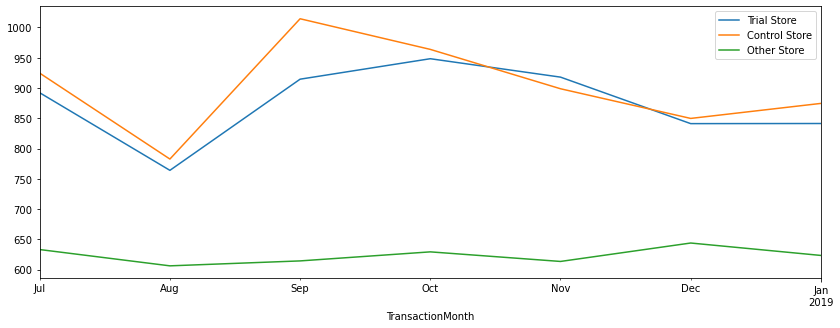

In [103]:
comparisonPlot.plot(figsize=(14,5))

From these, it clear that total sales of the control store and trial store over pre-trial period are closely related. However, I would compare for the number of customers

In [104]:
# get time series nCustomers plot for each category 
tStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 86,'nCustomers']
cStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 155,'nCustomers']
otherStore = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] != 155) & (preTrialMeasures['STORE_NBR'] != 86),'nCustomers']
otherStore = otherStore.reset_index().groupby('TransactionMonth').mean()

In [105]:
comparisonPlot = pd.concat([tStore, cStore, otherStore], axis=1)
comparisonPlot.columns = ['Trial Store', 'Control Store', 'Other Store']

<AxesSubplot:xlabel='TransactionMonth'>

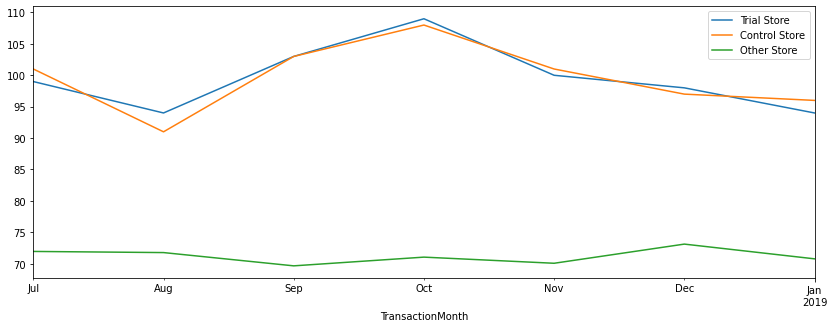

In [106]:
comparisonPlot.plot(figsize=(14,5))

Just like the Total sales plot, The number of customer plots for the trial and control are closely related while the average of other stores is relatively lower.

### <a id='#2.2.3'>2.2.3 Assessment of trial strore 86</a>

Again I would scale this control store to the level of the trial store

In [107]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
TransactionMonth,,,,,,,
2018-07-01,1,201807,206.9,49,1.061224,1.192308,3.337097
2018-08-01,1,201808,176.1,42,1.023810,1.255814,3.261111
2018-09-01,1,201809,278.8,59,1.050847,1.209677,3.717333
2018-10-01,1,201810,188.1,44,1.022727,1.288889,3.243103
2018-11-01,1,201811,192.6,46,1.021739,1.212766,3.378947


In [108]:
# get scaling factor
trial_totSales = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 86]['totSales'].sum()
control_totSales = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 155]['totSales'].sum()
scalingFactorForControlSales = trial_totSales/control_totSales

In [109]:
scalingFactorForControlSales

0.9700651481287746

In [110]:
scaledControlSales = measureOverTime.loc[measureOverTime['STORE_NBR'] == 155, 'totSales'] * scalingFactorForControlSales

In [111]:
# reset index
scaledControlSales = scaledControlSales.reset_index(drop=True)

In [112]:
trialStore = measureOverTime.loc[measureOverTime['STORE_NBR'] == 86, ['YEARMONTH','totSales']].reset_index(drop=True)

In [113]:
# join trial store and scaled control store
percentageDiff = pd.concat([trialStore, scaledControlSales], axis =1)

In [114]:
percentageDiff.head()

,YEARMONTH,totSales,totSales
0,201807,892.20,896.922236
1,201808,764.05,759.269991
2,201809,914.60,984.034086
3,201810,948.40,934.948790
4,201811,918.00,871.894555


In [115]:
percentageDiff.columns = ['YEARMONTH', 'Trial_store', 'Scaled_control_store']

In [116]:
percentageDiff.head()

,YEARMONTH,Trial_store,Scaled_control_store
0,201807,892.20,896.922236
1,201808,764.05,759.269991
2,201809,914.60,984.034086
3,201810,948.40,934.948790
4,201811,918.00,871.894555


In [117]:
percentageDiff['percentageDiff'] = abs(percentageDiff['Trial_store'] - percentageDiff['Scaled_control_store'])/percentageDiff['Scaled_control_store']

In [118]:
percentageDiff.head(12)

,YEARMONTH,Trial_store,Scaled_control_store,percentageDiff
0,201807,892.20,896.922236,0.005265
1,201808,764.05,759.269991,0.006296
2,201809,914.60,984.034086,0.070561
3,201810,948.40,934.948790,0.014387
4,201811,918.00,871.894555,0.052880
5,201812,841.20,824.361363,0.020426
6,201901,841.40,848.418979,0.008273
7,201902,913.20,864.522060,0.056306
8,201903,1026.80,780.320405,0.315870
9,201904,848.20,819.317024,0.035253


As my null hypothesis is that the trial period is the same as the pre-trial period, I would take the standard deviation based on the scaled percentage difference in the pre-trial period.

In [119]:
# check standard deviation for pretrial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()

In [120]:
# get the degrees of freedom, Since we have 8 pre-trial months, degree of freedom = 8 - 1 = 7
dof = 7

In [121]:
# get t-values for each month
percentageDiff['tValues'] = (percentageDiff['percentageDiff'] - 0) / stdDev

In [122]:
# display t-value during trial period
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905) ,'tValues']

7     2.179542
8    12.226922
9     1.364580
Name: tValues, dtype: float64

In [123]:
# estimate the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

The t-value at the middle of trial period is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March is statistically greater than in the control store. However, the sales in Febraury and April were very similar to that of control as result of the low t-values.

In [124]:
trialAssessment = percentageDiff[['YEARMONTH', 'Trial_store', 'Scaled_control_store']]
trialAssessment['transactionMonth'] = pd.to_datetime(trialAssessment['YEARMONTH'], format = '%Y%m')
trialAssessment.drop('YEARMONTH', axis = 1, inplace=True)
trialAssessment.set_index('transactionMonth', inplace = True)

In [125]:
trialAssessment['Control 5% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 - stdDev*2)
trialAssessment['Control 95% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 + stdDev*2)

In [126]:
trialAssessment.head(12)

,Trial_store,Scaled_control_store,Control 5% Confidence Interval,Control 95% Confidence Interval
transactionMonth,,,,
2018-07-01,892.20,896.922236,850.580142,943.264329
2018-08-01,764.05,759.269991,720.040101,798.499882
2018-09-01,914.60,984.034086,933.191106,1034.877067
2018-10-01,948.40,934.948790,886.641944,983.255636
2018-11-01,918.00,871.894555,826.845589,916.943521
2018-12-01,841.20,824.361363,781.768338,866.954388
2019-01-01,841.40,848.418979,804.582947,892.255010
2019-02-01,913.20,864.522060,819.854016,909.190104
2019-03-01,1026.80,780.320405,740.002884,820.637926


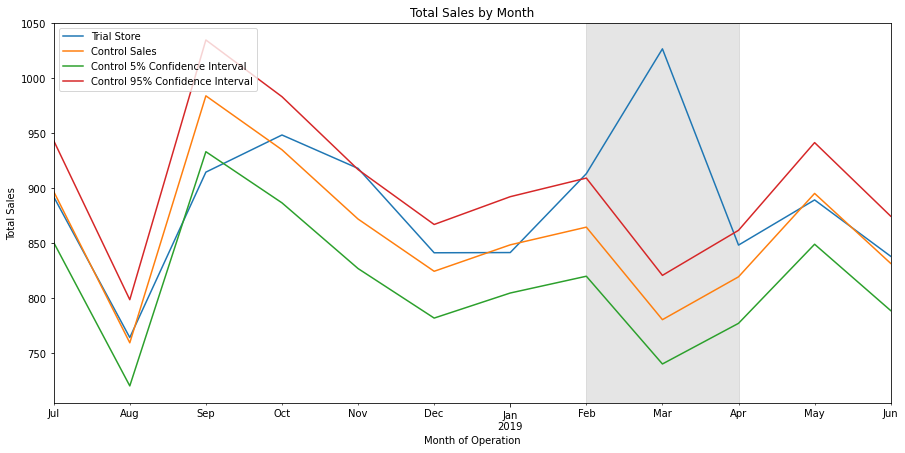

In [127]:
# plot dataframe
trialAssessment.plot(figsize = (15,7))

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

# Highlight trial period
plt.axvspan('2019-02-01', '2019-04-01', color='grey', alpha=0.2)

# set plot legend
plt.legend(['Trial Store', 'Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval' ], loc = 2)


The result reveals that the trial store 86 is not statistically different from the control store over the trial period, with the trial store's performance falling within the 5% to 95% confidence interval of the control store for two months during the trial period.

I will also assess this for number of customers.

In [128]:
# get scaling factor
trial_nCust = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 86]['nCustomers'].sum()
control_nCust = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 155]['nCustomers'].sum()
scalingFactorForControlCust = trial_nCust/control_nCust

In [129]:
scalingFactorForControlCust

1.0

In [130]:
scaledControlCustomers = measureOverTime.loc[measureOverTime['STORE_NBR'] == 155, 'nCustomers'] * scalingFactorForControlCust

In [131]:
# reset index
scaledControlCustomers = scaledControlCustomers.reset_index(drop=True)

In [132]:
trialStore = measureOverTime.loc[measureOverTime['STORE_NBR'] == 86, ['YEARMONTH','nCustomers']].reset_index(drop=True)

In [133]:
# join trial store and scaled control store
percentageDiff = pd.concat([trialStore, scaledControlCustomers], axis =1)

In [134]:
percentageDiff.head()

,YEARMONTH,nCustomers,nCustomers
0,201807,99,101.0
1,201808,94,91.0
2,201809,103,103.0
3,201810,109,108.0
4,201811,100,101.0


In [135]:
percentageDiff.columns = ['YEARMONTH', 'Trial_store', 'Scaled_control_store']

In [136]:
percentageDiff.head()

,YEARMONTH,Trial_store,Scaled_control_store
0,201807,99,101.0
1,201808,94,91.0
2,201809,103,103.0
3,201810,109,108.0
4,201811,100,101.0


In [137]:
percentageDiff['percentageDiff'] = abs(percentageDiff['Trial_store'] - percentageDiff['Scaled_control_store'])/percentageDiff['Scaled_control_store']

In [138]:
percentageDiff.head(12)

,YEARMONTH,Trial_store,Scaled_control_store,percentageDiff
0,201807,99,101.0,0.019802
1,201808,94,91.0,0.032967
2,201809,103,103.0,0.000000
3,201810,109,108.0,0.009259
4,201811,100,101.0,0.009901
5,201812,98,97.0,0.010309
6,201901,94,96.0,0.020833
7,201902,107,95.0,0.126316
8,201903,115,94.0,0.223404
9,201904,105,99.0,0.060606


As my null hypothesis is that the trial period is the same as the pre-trial period, I would take the standard deviation based on the scaled percentage difference in the pre-trial period.

In [139]:
# check standard deviation for pretrial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()

In [140]:
# get the degrees of freedom, Since we have 8 pre-trial months, degree of freedom = 8 - 1 = 7
dof = 7

In [141]:
# get t-values for each month
percentageDiff['tValues'] = (percentageDiff['percentageDiff'] - 0) / stdDev

In [142]:
# display t-value during trial period
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905) ,'tValues']

7    11.819082
8    20.903430
9     5.670772
Name: tValues, dtype: float64

In [143]:
# estimate the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

The t-value through out the trial period is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

In [144]:
trialAssessment = percentageDiff[['YEARMONTH', 'Trial_store', 'Scaled_control_store']]
trialAssessment['transactionMonth'] = pd.to_datetime(trialAssessment['YEARMONTH'], format = '%Y%m')
trialAssessment.drop('YEARMONTH', axis = 1, inplace=True)
trialAssessment.set_index('transactionMonth', inplace = True)

In [145]:
trialAssessment['Control 5% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 - stdDev*2)
trialAssessment['Control 95% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 + stdDev*2)

In [146]:
trialAssessment.head(12)

,Trial_store,Scaled_control_store,Control 5% Confidence Interval,Control 95% Confidence Interval
transactionMonth,,,,
2018-07-01,99,101.0,98.841136,103.158864
2018-08-01,94,91.0,89.054885,92.945115
2018-09-01,103,103.0,100.798386,105.201614
2018-10-01,109,108.0,105.691512,110.308488
2018-11-01,100,101.0,98.841136,103.158864
2018-12-01,98,97.0,94.926636,99.073364
2019-01-01,94,96.0,93.948011,98.051989
2019-02-01,107,95.0,92.969386,97.030614
2019-03-01,115,94.0,91.990760,96.009240


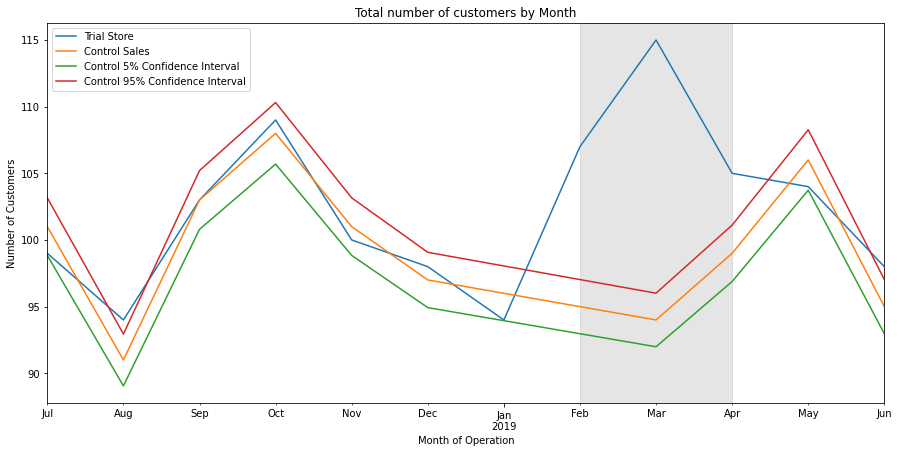

In [147]:
# plot dataframe
trialAssessment.plot(figsize = (15,7))

# Set graph title and axis title
plt.title('Total number of customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

# Highlight trial period
plt.axvspan('2019-02-01', '2019-04-01', color='grey', alpha=0.2)

# set plot legend
plt.legend(['Trial Store', 'Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval' ], loc = 2)


In all three months, it appears that the number of customers increased drastically. This indicates that the trial had a significant effect in boosting the number of customers in store 86 but as seen, sales were not significantly higher. We should investigate with the Category Manager to see if there were any special promotions in the trial store that were may have resulted in lower prices, impacting the results.

## <a id='2.3'>2.3 Assessing Store 88 Performance </a>

I will repeat the process for store 88 as well

In [148]:
# get corr for totsales and nCustomers metrics
corr_nSales = calculateCorrelation(88, preTrialMeasures, 'totSales')
corr_nCustomers = calculateCorrelation(88, preTrialMeasures, 'nCustomers')

# get magnitude distance for totsales and nCustomers metrics
magnitude_nSales = calculateMagnitudeDistance(88, preTrialMeasures, 'totSales')
magnitude_nCustomers = calculateMagnitudeDistance(88, preTrialMeasures, 'nCustomers')

In [149]:
# join corr and magnitude df together
score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)
score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)

In [150]:
# estimate a single score using a weight averaged of 0.5
corr_weight = 0.5
score_nSales['scoreNSales'] = (corr_weight * score_nSales['Corr']) + ((1-corr_weight) * score_nSales['Magnitude'])
score_nCustomers['scoreNCust'] = (corr_weight * score_nCustomers['Corr']) + ((1-corr_weight) * score_nCustomers['Magnitude'])                                                              

In [151]:
score_nSales.head()

,Trial_store,Control_store,Corr,Magnitude,scoreNSales
0,88,1,0.813636,0.548959,0.681297
1,88,2,-0.067927,0.541212,0.236643
2,88,3,-0.507847,0.458109,-0.024869
3,88,4,-0.745566,0.484447,-0.130559
4,88,5,0.190330,0.496409,0.343370


In [152]:
score_nCustomers.head()

,Trial_store,Control_store,Corr,Magnitude,scoreNCust
0,88,1,0.305334,0.357143,0.331238
1,88,2,-0.452379,0.285714,-0.083332
2,88,3,0.522884,0.683673,0.603279
3,88,4,-0.361503,0.577922,0.108210
4,88,5,-0.025320,0.558442,0.266561


In [153]:
# join both scores together
score_Control = pd.concat([score_nSales[['Trial_store', 'Control_store', 'scoreNSales']], 
                           score_nCustomers['scoreNCust']], axis = 1)

In [154]:
score_Control.head()

,Trial_store,Control_store,scoreNSales,scoreNCust
0,88,1,0.681297,0.331238
1,88,2,0.236643,-0.083332
2,88,3,-0.024869,0.603279
3,88,4,-0.130559,0.108210
4,88,5,0.343370,0.266561


In [155]:
# get average of both scores
score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNSales'] + score_Control['scoreNCust'])

In [156]:
score_Control.head()

,Trial_store,Control_store,scoreNSales,scoreNCust,finalControlScore
0,88,1,0.681297,0.331238,0.506268
1,88,2,0.236643,-0.083332,0.076655
2,88,3,-0.024869,0.603279,0.289205
3,88,4,-0.130559,0.108210,-0.011175
4,88,5,0.343370,0.266561,0.304965


### <a id='#2.3.1'>2.3.1 Selecting a control store</a>

In [157]:
# sort by finalControl score
score_Control.sort_values(by='finalControlScore', ascending=False)

,Trial_store,Control_store,scoreNSales,scoreNCust,finalControlScore
170,88,178,0.650803,0.707828,0.679316
12,88,14,0.646064,0.685774,0.665919
126,88,134,0.775084,0.540154,0.657619
225,88,237,0.451974,0.777235,0.614604
179,88,187,0.616752,0.594560,0.605656
...,...,...,...,...,...
44,88,48,-0.174440,-0.050650,-0.112545
227,88,239,-0.109933,-0.123703,-0.116818
125,88,133,-0.119811,-0.175477,-0.147644
17,88,19,-0.081841,-0.247593,-0.164717


Store 178 had the highest final score, therefore I will be selecting this as the control store for trial store 88

### <a id='#2.3.2'>2.3.2 Comparison of control store, Trial store 88 and other stores</a>

Now that I have selected store 155, I will plot the totSales and nCustomers over the pre-trial period for the control store, Trial store 86 and other stores

In [158]:
preTrialMeasures['TransactionMonth'] = pd.to_datetime(preTrialMeasures['YEARMONTH'].astype(str), format='%Y%m')

In [159]:
preTrialMeasures.set_index('TransactionMonth', inplace=True)

In [160]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
TransactionMonth,,,,,,,
2018-07-01,1,201807,206.9,49,1.061224,1.192308,3.337097
2018-08-01,1,201808,176.1,42,1.023810,1.255814,3.261111
2018-09-01,1,201809,278.8,59,1.050847,1.209677,3.717333
2018-10-01,1,201810,188.1,44,1.022727,1.288889,3.243103
2018-11-01,1,201811,192.6,46,1.021739,1.212766,3.378947


In [161]:
# get time series totsales plot for each category 
tStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 88,'totSales']
cStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 178,'totSales']
otherStore = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] != 178) & (preTrialMeasures['STORE_NBR'] != 88),'totSales']
otherStore = otherStore.reset_index().groupby('TransactionMonth').mean()

In [162]:
comparisonPlot = pd.concat([tStore, cStore, otherStore], axis=1)
comparisonPlot.columns = ['Trial Store', 'Control Store', 'Other Store']

<AxesSubplot:xlabel='TransactionMonth'>

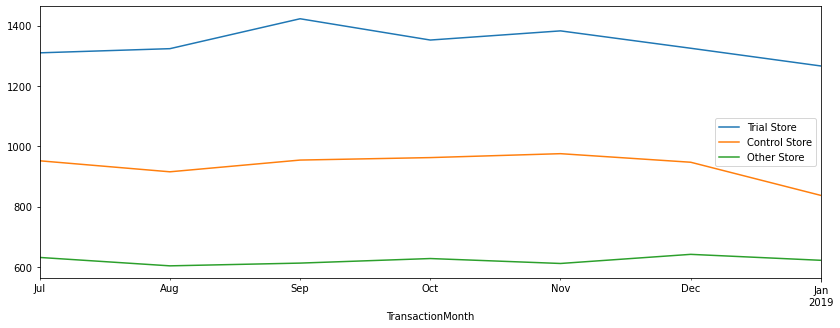

In [163]:
comparisonPlot.plot(figsize=(14,5))

The overall sales of Store 178 are considerably different from that of the trial store, therefore let's look at some additional high-scoring stores such as store 14, store 134 and store 237

In [164]:
# get time series totsales plot for each category 
tStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 88,'totSales']
cStore1 = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 14,'totSales']
cStore2 = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 134,'totSales']
cStore3 = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 237,'totSales']
otherStore = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] != 14) & (preTrialMeasures['STORE_NBR'] != 88),'totSales']
otherStore = otherStore.reset_index().groupby('TransactionMonth').mean()

In [165]:
comparisonPlot = pd.concat([tStore, cStore, cStore2, cStore3, otherStore], axis=1)
comparisonPlot.columns = ['Trial Store', 'Control Store1', 'Control Store2', 'Control Store3', 'Other Store']

<AxesSubplot:xlabel='TransactionMonth'>

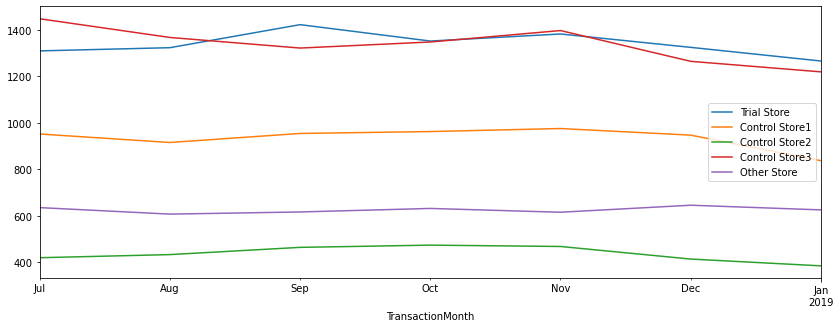

In [166]:
comparisonPlot.plot(figsize=(14,5))

Store 237 is the most similar to the trial store, so I'll choose it as the control store. Let's double-check that the quantity of customers is also closely related.

In [167]:
# get time series nCustomers plot for each category 
tStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 88,'nCustomers']
cStore = preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 237,'nCustomers']
otherStore = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] != 237) & (preTrialMeasures['STORE_NBR'] != 88),'nCustomers']
otherStore = otherStore.reset_index().groupby('TransactionMonth').mean()

In [168]:
comparisonPlot = pd.concat([tStore, cStore, otherStore], axis=1)
comparisonPlot.columns = ['Trial Store', 'Control Store', 'Other Store']

<AxesSubplot:xlabel='TransactionMonth'>

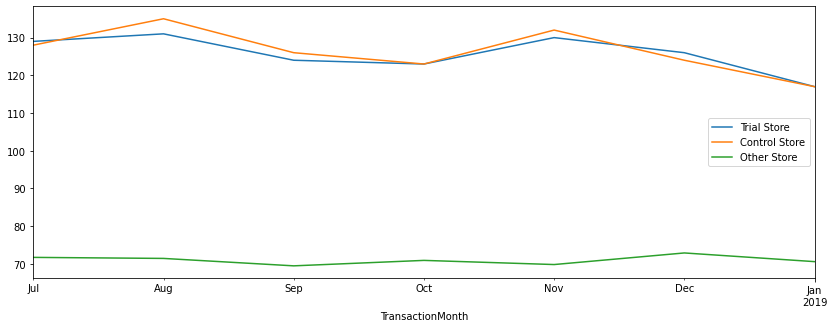

In [169]:
comparisonPlot.plot(figsize=(14,5))

Just like the Total sales plot, The number of customer plots for the trial and control stores are closely related while the average of other stores is relatively lower.

### <a id='#2.3.3'>2.3.3 Assessment of trial strore 88</a>

After verifying the strong similarity between the trial store and control store, I will now compare their performances during the trial period. I will start by scaling the control store to the level of the trial store

In [170]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
TransactionMonth,,,,,,,
2018-07-01,1,201807,206.9,49,1.061224,1.192308,3.337097
2018-08-01,1,201808,176.1,42,1.023810,1.255814,3.261111
2018-09-01,1,201809,278.8,59,1.050847,1.209677,3.717333
2018-10-01,1,201810,188.1,44,1.022727,1.288889,3.243103
2018-11-01,1,201811,192.6,46,1.021739,1.212766,3.378947


In [171]:
# get scaling factor
trial_totSales = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 88]['totSales'].sum()
control_totSales = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 237]['totSales'].sum()
scalingFactorForControlSales = trial_totSales/control_totSales

In [172]:
scalingFactorForControlSales

1.0015583306649594

In [173]:
scaledControlSales = measureOverTime.loc[measureOverTime['STORE_NBR'] == 237, 'totSales'] * scalingFactorForControlSales

In [174]:
# reset index
scaledControlSales = scaledControlSales.reset_index(drop=True)

In [175]:
trialStore = measureOverTime.loc[measureOverTime['STORE_NBR'] == 88, ['YEARMONTH','totSales']].reset_index(drop=True)

In [176]:
# join trial store and scaled control store
percentageDiff = pd.concat([trialStore, scaledControlSales], axis =1)

In [177]:
percentageDiff.head()

,YEARMONTH,totSales,totSales
0,201807,1310.0,1450.657086
1,201808,1323.8,1369.931485
2,201809,1423.0,1324.260425
3,201810,1352.4,1350.401097
4,201811,1382.8,1399.777923


In [178]:
percentageDiff.columns = ['YEARMONTH', 'Trial_store', 'Scaled_control_store']

In [179]:
percentageDiff.head()

,YEARMONTH,Trial_store,Scaled_control_store
0,201807,1310.0,1450.657086
1,201808,1323.8,1369.931485
2,201809,1423.0,1324.260425
3,201810,1352.4,1350.401097
4,201811,1382.8,1399.777923


In [180]:
percentageDiff['percentageDiff'] = abs(percentageDiff['Trial_store'] - percentageDiff['Scaled_control_store'])/percentageDiff['Scaled_control_store']

In [181]:
percentageDiff.head(12)

,YEARMONTH,Trial_store,Scaled_control_store,percentageDiff
0,201807,1310.00,1450.657086,0.096961
1,201808,1323.80,1369.931485,0.033674
2,201809,1423.00,1324.260425,0.074562
3,201810,1352.40,1350.401097,0.001480
4,201811,1382.80,1399.777923,0.012129
5,201812,1325.20,1266.971288,0.045959
6,201901,1266.40,1221.600696,0.036673
7,201902,1370.20,1406.989143,0.026147
8,201903,1477.20,1210.082775,0.220743
9,201904,1439.40,1206.477165,0.193060


As my null hypothesis is that the trial period is the same as the pre-trial period, I would take the standard deviation based on the scaled percentage difference in the pre-trial period.

In [182]:
# check standard deviation for pretrial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()

In [183]:
# get the degrees of freedom, Since we have 8 pre-trial months, degree of freedom = 8 - 1 = 7
dof = 7

In [184]:
# get t-values for each month
percentageDiff['tValues'] = (percentageDiff['percentageDiff'] - 0) / stdDev

In [185]:
# display t-value during trial period
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905) ,'tValues']

7    0.781270
8    6.595668
9    5.768527
Name: tValues, dtype: float64

In [186]:
# estimate the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

The t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

In [187]:
trialAssessment = percentageDiff[['YEARMONTH', 'Trial_store', 'Scaled_control_store']]
trialAssessment['transactionMonth'] = pd.to_datetime(trialAssessment['YEARMONTH'], format = '%Y%m')
trialAssessment.drop('YEARMONTH', axis = 1, inplace=True)
trialAssessment.set_index('transactionMonth', inplace = True)

In [188]:
trialAssessment['Control 5% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 - stdDev*2)
trialAssessment['Control 95% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 + stdDev*2)

In [189]:
trialAssessment.head(12)

,Trial_store,Scaled_control_store,Control 5% Confidence Interval,Control 95% Confidence Interval
transactionMonth,,,,
2018-07-01,1310.00,1450.657086,1353.556288,1547.757884
2018-08-01,1323.80,1369.931485,1278.234114,1461.628855
2018-09-01,1423.00,1324.260425,1235.620080,1412.900769
2018-10-01,1352.40,1350.401097,1260.011008,1440.791187
2018-11-01,1382.80,1399.777923,1306.082759,1493.473086
2018-12-01,1325.20,1266.971288,1182.165634,1351.776942
2019-01-01,1266.40,1221.600696,1139.831956,1303.369436
2019-02-01,1370.20,1406.989143,1312.811291,1501.166995
2019-03-01,1477.20,1210.082775,1129.084996,1291.080555


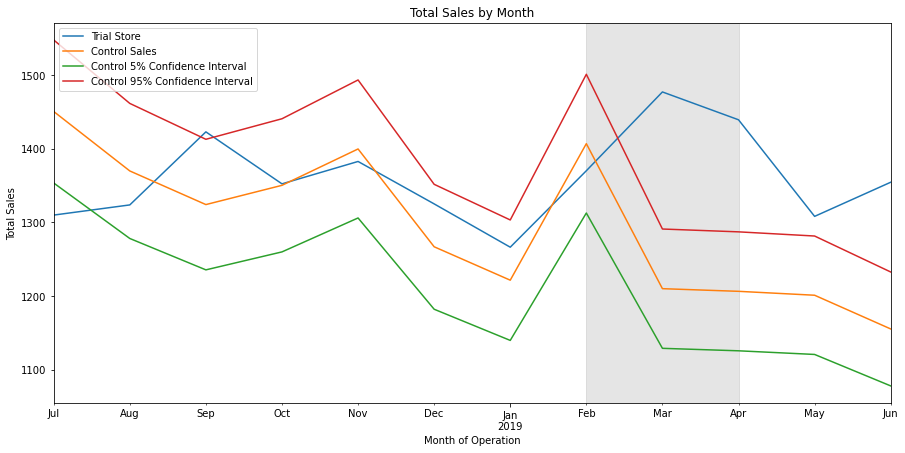

In [190]:
# plot dataframe
trialAssessment.plot(figsize = (15,7))

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

# Highlight trial period
plt.axvspan('2019-02-01', '2019-04-01', color='grey', alpha=0.2)

# set plot legend
plt.legend(['Trial Store', 'Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval' ], loc = 2)


The result shows that the trial in store 86 is statistically different from the control store over the trial period, with the trial store performance falling outside the control store's 5% to 95% confidence interval in two of the three trial months.

I will also assess this for number of customers.

In [191]:
# get scaling factor
trial_nCust = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 88]['nCustomers'].sum()
control_nCust = preTrialMeasures[preTrialMeasures['STORE_NBR'] == 237]['nCustomers'].sum()
scalingFactorForControlCust = trial_nCust/control_nCust

In [192]:
scalingFactorForControlCust

0.9943502824858758

In [193]:
scaledControlCustomers = measureOverTime.loc[measureOverTime['STORE_NBR'] == 237, 'nCustomers'] * scalingFactorForControlCust

In [194]:
# reset index
scaledControlCustomers = scaledControlCustomers.reset_index(drop=True)

In [195]:
trialStore = measureOverTime.loc[measureOverTime['STORE_NBR'] == 88, ['YEARMONTH','nCustomers']].reset_index(drop=True)

In [196]:
# join trial store and scaled control store
percentageDiff = pd.concat([trialStore, scaledControlCustomers], axis =1)

In [197]:
percentageDiff.head()

,YEARMONTH,nCustomers,nCustomers
0,201807,129,127.276836
1,201808,131,134.237288
2,201809,124,125.288136
3,201810,123,122.305085
4,201811,130,131.254237


In [198]:
percentageDiff.columns = ['YEARMONTH', 'Trial_store', 'Scaled_control_store']

In [199]:
percentageDiff.head()

,YEARMONTH,Trial_store,Scaled_control_store
0,201807,129,127.276836
1,201808,131,134.237288
2,201809,124,125.288136
3,201810,123,122.305085
4,201811,130,131.254237


In [200]:
percentageDiff['percentageDiff'] = abs(percentageDiff['Trial_store'] - percentageDiff['Scaled_control_store'])/percentageDiff['Scaled_control_store']

In [201]:
percentageDiff.head(12)

,YEARMONTH,Trial_store,Scaled_control_store,percentageDiff
0,201807,129,127.276836,0.013539
1,201808,131,134.237288,0.024116
2,201809,124,125.288136,0.010281
3,201810,123,122.305085,0.005682
4,201811,130,131.254237,0.009556
5,201812,126,123.299435,0.021902
6,201901,117,116.338983,0.005682
7,201902,124,125.288136,0.010281
8,201903,134,118.327684,0.132448
9,201904,128,119.322034,0.072727


As my null hypothesis is that the trial period is the same as the pre-trial period, I would take the standard deviation based on the scaled percentage difference in the pre-trial period.

In [202]:
# check standard deviation for pretrial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()

In [203]:
# get the degrees of freedom, Since we have 8 pre-trial months, degree of freedom = 8 - 1 = 7
dof = 7

In [204]:
# get t-values for each month
percentageDiff['tValues'] = (percentageDiff['percentageDiff'] - 0) / stdDev

In [205]:
# display t-value during trial period
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905) ,'tValues']

7     1.387456
8    17.873693
9     9.814423
Name: tValues, dtype: float64

In [206]:
# estimate the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

The t-value through out the trial period is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

In [207]:
trialAssessment = percentageDiff[['YEARMONTH', 'Trial_store', 'Scaled_control_store']]
trialAssessment['transactionMonth'] = pd.to_datetime(trialAssessment['YEARMONTH'], format = '%Y%m')
trialAssessment.drop('YEARMONTH', axis = 1, inplace=True)
trialAssessment.set_index('transactionMonth', inplace = True)

In [208]:
trialAssessment['Control 5% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 - stdDev*2)
trialAssessment['Control 95% Confidence Interval'] = trialAssessment['Scaled_control_store'] * (1 + stdDev*2)

In [209]:
trialAssessment.head(12)

,Trial_store,Scaled_control_store,Control 5% Confidence Interval,Control 95% Confidence Interval
transactionMonth,,,,
2018-07-01,129,127.276836,125.390531,129.163141
2018-08-01,131,134.237288,132.247826,136.226750
2018-09-01,124,125.288136,123.431304,127.144967
2018-10-01,123,122.305085,120.492464,124.117706
2018-11-01,130,131.254237,129.308985,133.199489
2018-12-01,126,123.299435,121.472077,125.126793
2019-01-01,117,116.338983,114.614782,118.063184
2019-02-01,124,125.288136,123.431304,127.144967
2019-03-01,134,118.327684,116.574010,120.081358


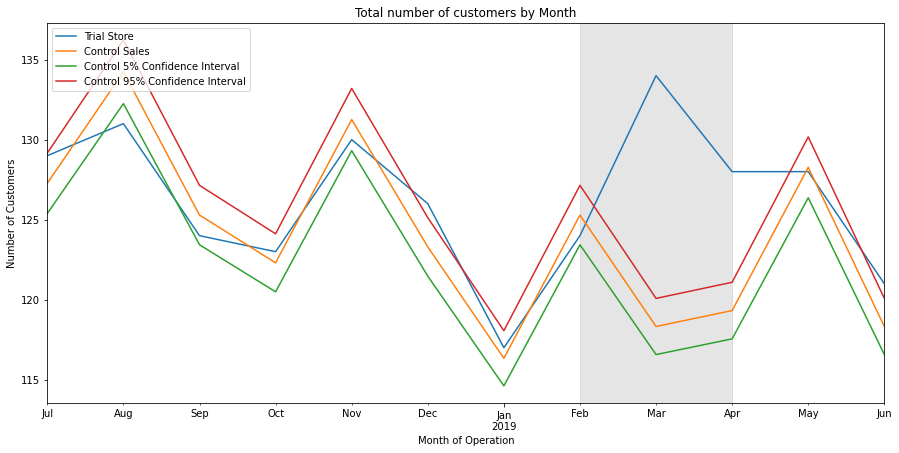

In [210]:
# plot dataframe
trialAssessment.plot(figsize = (15,7))

# Set graph title and axis title
plt.title('Total number of customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')

# Highlight trial period
plt.axvspan('2019-02-01', '2019-04-01', color='grey', alpha=0.2)

# set plot legend
plt.legend(['Trial Store', 'Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval' ], loc = 2)


The number of customers increased greatly for 2 months in the trial period (March and April)

# <a id='3.'>3. Conclusion and Recommendation </a>

## <a id='3.1'>3.1 Conclusion </a>

Following a comparison of the three trial stores with their respective control stores, a brief description of the performance of the trial stores is provided below.

Both measures showed that Stores 77 and 88 performed substantially better than their control stores with a significantly higher volume of sales and customers during the trial period. In terms of overall sales, store 86's performance was fairly close to that of its control store. However, throughout the trial period, this trial store experienced a high influx of customers, which could have been due to special offers.

## <a id='3.2'>3.2 Recommendation </a>

To sum up, the trial had a positive impact because the number of customers increased for all trial stores and total sales increased as well, with the exception of trial store 86, which had overall sales that were relatively close to its control store. As a result, I recommend that the trial layout be implemented in other stores.